# Práctica 3 - Ruidos y filtros

## Preparación

Para correr este Jupyter Notebook es necesario tener instalado Octave y octave_kernel, el cual permite utilizar Octave en Jupyter. En Ubuntu se pueden instalar mediante:

```
sudo apt-get install octave
```

y

```
pip3 install octave_kernel
```


## 1. Convolución

In [1]:
I = imread("img/puertita.jpg");

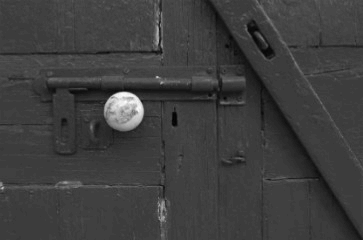

In [2]:
imshow(I)

### 1.a Filtro pasabajos

Filtro pasa bajos de 3x3

In [3]:
I2 = zeros(size(I));
for i = 2 : size(I, 1) - 1
    for j = 2 : size(I, 2) - 1
        I2(i - 1, j - 1) = sum(sum(I(i-1:i+1, j-1:j+1))) / 9;
    end
end;

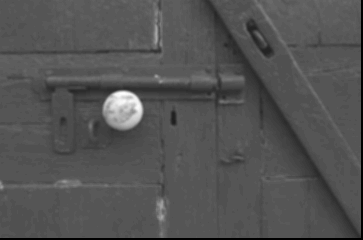

In [4]:
imshow(I2)

Filtro pasa bajos de 5x5

In [5]:
I3 = zeros(size(I));
for i = 3 : size(I, 1) - 2
    for j = 3 : size(I, 2) - 2
        I3(i, j) = sum(sum(I(i-2:i+2, j-2:j+2))) / 25;
    end
end;

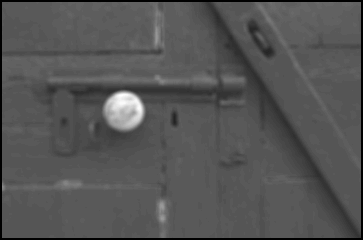

In [6]:
imshow(I3);

Generalizamos la función para cualquier tipo de filtro. Hacemos padding con 0s en la imagen de salida para que tenga el mismo tamaño que la imagen original.

In [7]:
function conv = myconv(img, filter)
    img = cast(img, 'single');
    conv = zeros(size(img));
    filterSize = size(filter, 1);
    halfSize = floor(filterSize / 2);
    
    for i = (halfSize + 1) : (size(img, 1) - halfSize)
        for j = (halfSize + 1) : (size(img, 2) - halfSize)
            x = img(i-halfSize : i+halfSize, j-halfSize : j+halfSize) .* rot90(filter, 2);
            conv(i, j) = sum(sum(x));
        end
    end;
endfunction

Si observamos la esquina superior de la imagen, la primer columna y primer fila son 0s. Comparándolo con la función `conv2` de Octave/Matlab, bajo la opción "same", ésta paddea con valores promediados en vez de 0s.

In [8]:
myconv(I, ones(3)/9)(1:5, 1:5)

ans =

    0.00000    0.00000    0.00000    0.00000    0.00000
    0.00000   82.22222   83.44444   83.88889   82.55556
    0.00000   81.22222   81.33334   81.33334   80.44445
    0.00000   81.66667   81.33333   81.11111   80.22222
    0.00000   81.88889   82.00000   82.00000   81.33334



In [9]:
conv2(I, ones(3)/9, "same")(1:5, 1:5)

ans =

   36.333   55.444   56.778   57.222   56.111
   54.222   82.222   83.444   83.889   82.556
   54.111   81.222   81.333   81.333   80.444
   54.556   81.667   81.333   81.111   80.222
   54.556   81.889   82.000   82.000   81.333



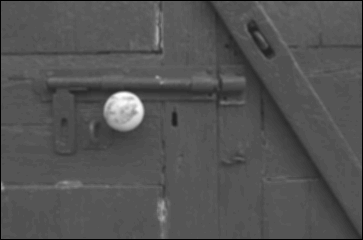

In [10]:
imshow(myconv(I, ones(3)/9))

### 1.b Filtro pasa altos

In [11]:
filt = zeros(3);
filt(2,2) = 2;
filt

filt =

   0   0   0
   0   2   0
   0   0   0



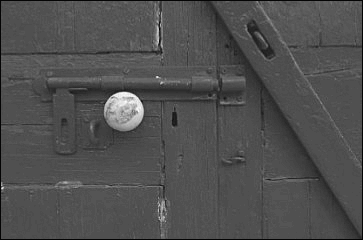

In [12]:
imshow(myconv(I, filt - ones(3)/9))

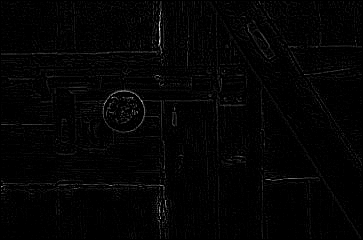

In [13]:
imshow(I - conv2(I, filt - ones(3)/9, "same"))

## 2. Aplicación de máscara rectangular

Experimentamos aplicando un kernel rectangular, lo cual operará de manera asimétrica con los píxeles

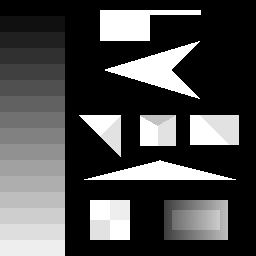

In [14]:
I = imread("img/test.png");
imshow(I);

In [15]:
rect = [2 0 0 -2; -1 0 0 1; 2 0 0 -2]

rect =

   2   0   0  -2
  -1   0   0   1
   2   0   0  -2



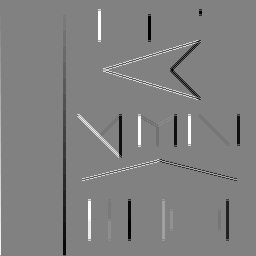

In [16]:
imshow(conv2(I, rect, "same"))

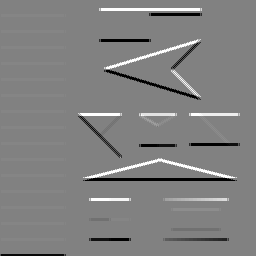

In [17]:
imshow(conv2(I, rect', "same"))

## 3. Aplicar máscaras a test.png y lena.png

### 3a. Suavizado mediante filtro gaussiano de tamaño 5

In [18]:
kernel_gaussiano =[1,4,6,4,1; 4,16,24,16,4; 6,24,36,24,6; 4,16,24,16,4; 1,4,6,4,1]/256

kernel_gaussiano =

   0.0039062   0.0156250   0.0234375   0.0156250   0.0039062
   0.0156250   0.0625000   0.0937500   0.0625000   0.0156250
   0.0234375   0.0937500   0.1406250   0.0937500   0.0234375
   0.0156250   0.0625000   0.0937500   0.0625000   0.0156250
   0.0039062   0.0156250   0.0234375   0.0156250   0.0039062



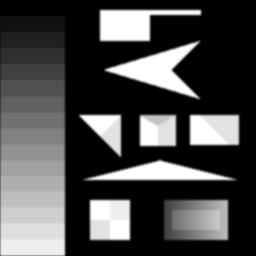

In [19]:
I = imread("img/test.png");
imshow(conv2(I, kernel_gaussiano, "same"))

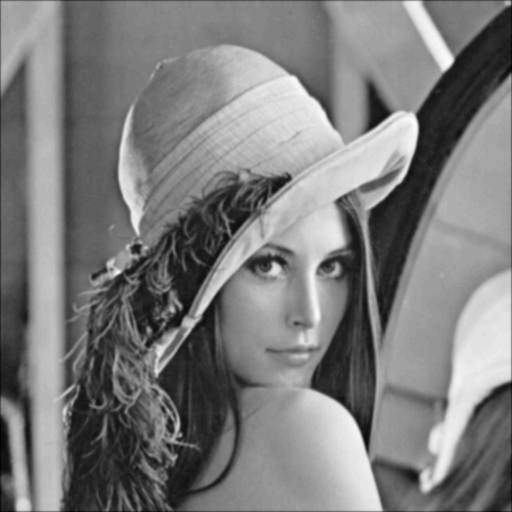

In [20]:
I = imread("img/lena.png");
imshow(conv2(I, kernel_gaussiano, "same"))

### 3b. Realce de bordes mediante Unsharp Masking

La idea de Unsharp Masking es:
    1. Se toma la imagen original
    2. Se le aplica un filtro pasa bajos
    3. Se resta la imagen original menos la recién filtrada en el punto (2), imitando un filtro pasa altos
    4. Se suma la original y la obtenida en (3) multiplicada por un escalar k

Mostraremos estos 4 pasos que utilizamos para obtener el filtro Unsharp Masking en la imágenes test.png y lena.png, con el escalar k = 5

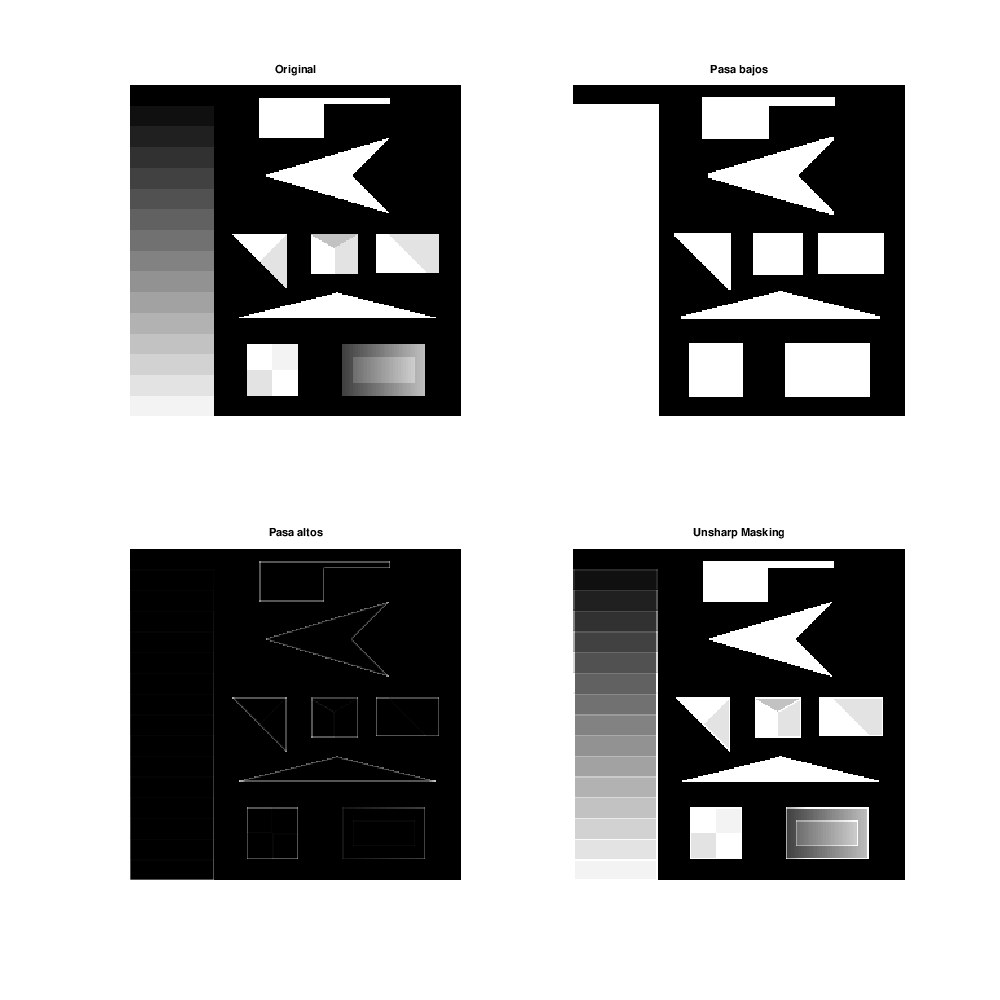

In [21]:
I = imread("img/test.png");

I_pasabajos = conv2(I, ones(3)/9, "same");
I_pasaaltos = I - I_pasabajos;
I_unsharpmasking = I + I_pasaaltos * 5;

set(gcf,'units','points','position', [10,10,1000,1000])
subplot(2,2,1); imshow(I); title('Original');
subplot(2,2,2), imshow(I_pasabajos); title('Pasa bajos');
subplot(2,2,3), imshow(I_pasaaltos); title('Pasa altos');
subplot(2,2,4), imshow(I_unsharpmasking); title('Unsharp Masking');

Vemos como los bordes son marcados, sobretodo en el gradiente de grises de la izquierda, que se remarca con una línea blanca en cada cambio de intensidad del gris

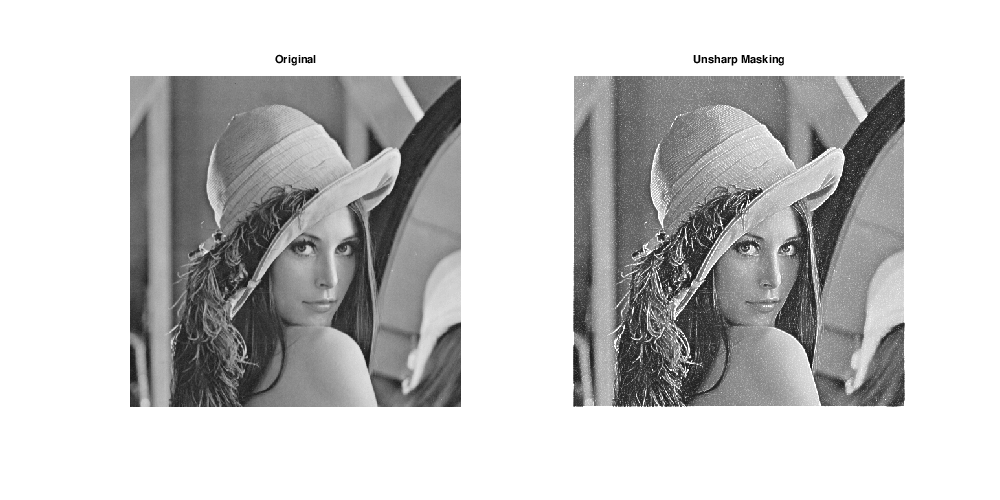

In [22]:
I = imread("img/lena.png");
I_pasabajos = conv2(I, ones(3)/9, "same");
I_pasaaltos = I - I_pasabajos;
I_unsharpmasking = I + I_pasaaltos * 5;
set(gcf,'units','points','position',[10,10,1000,500])
subplot(1,2,1); imshow(I); title('Original');
subplot(1,2,2), imshow(I_unsharpmasking); title('Unsharp Masking');

En la foto de Lena se puede apreciar de manera diferente la manera de resaltar los bordes que tiene la técnica. Vemos por un lado partes que quedaron parecidas (quizás un poco ruidosas) debido a no tener bordes en ese lado, como el hombro de Lena. Por otro lado, observamos que los bordes del rostro y sombrero se ven delimitados por una línea blanca. Finalmente apreciamos que las plumas del sombrero resultaron con muchas lineas blancas, denotando abundancia de bordes y cambio de intensidades de gris en ese área.

Una observación interesante es que esta técnica puede agregar ruido a partes donde no hay bordes. Esto se podrá ajustar de diversas maneras, tales como cambiando el valor del k utilizado, y de la manera que aplicamos el filtro pasabajos.

## 4. Filtro con imagenes ruidosas

### 4a. Ruido gaussiano aditivo

In [23]:
Igauss = normrnd(0, 1, size(I));
Igauss(1:5, 1:5)

ans =

   0.766416  -0.857920  -0.179808   2.474993  -0.422765
   1.751368   1.506732  -0.040517  -0.588504   1.083212
   1.662238   0.187782  -0.637784   0.347652  -0.012047
  -0.202948   0.420607  -0.852806  -1.040958   1.031360
   0.417932  -1.266637   0.229236   0.227417   0.461044



In [24]:
function res = addNoise(I, Inoise, perc)
    res = I + (Inoise * (perc/100)*255);
endfunction

In [25]:
I = imread("img/lena.png");

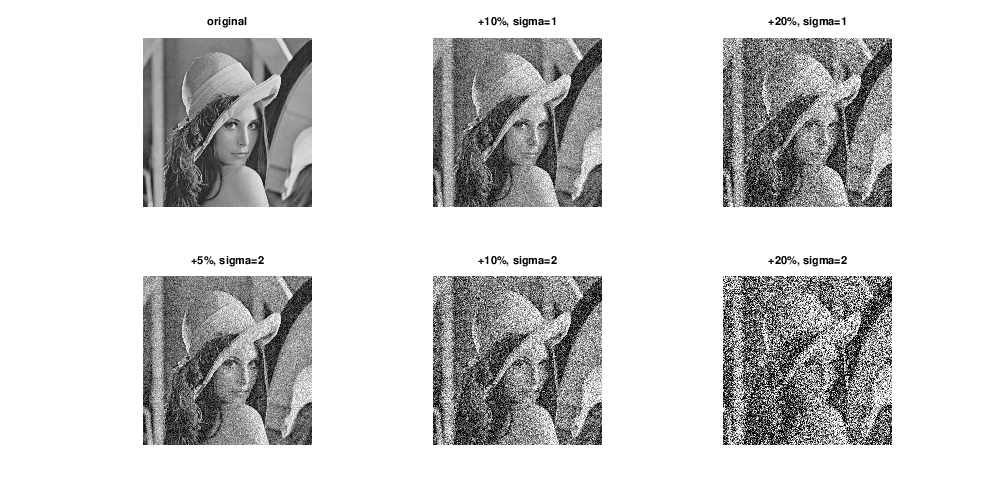

In [26]:
%plot -s 1000,500
subplot(231); imshow(I); title("original");
subplot(232); imshow(addNoise(I, Igauss, 10)); title("+10%, sigma=1");
subplot(233); imshow(addNoise(I, Igauss, 20)); title("+20%, sigma=1");

Igauss2 = normrnd(0, 2, size(I));
subplot(234); imshow(addNoise(I, Igauss2, 5)); title("+5%, sigma=2");
subplot(235); imshow(addNoise(I, Igauss2, 10)); title("+10%, sigma=2");
subplot(236); imshow(addNoise(I, Igauss2, 20)); title("+20%, sigma=2");

In [27]:
kernel_gaussiano =[1,4,6,4,1; 4,16,24,16,4; 6,24,36,24,6; 4,16,24,16,4; 1,4,6,4,1]/256

kernel_gaussiano =

   0.0039062   0.0156250   0.0234375   0.0156250   0.0039062
   0.0156250   0.0625000   0.0937500   0.0625000   0.0156250
   0.0234375   0.0937500   0.1406250   0.0937500   0.0234375
   0.0156250   0.0625000   0.0937500   0.0625000   0.0156250
   0.0039062   0.0156250   0.0234375   0.0156250   0.0039062



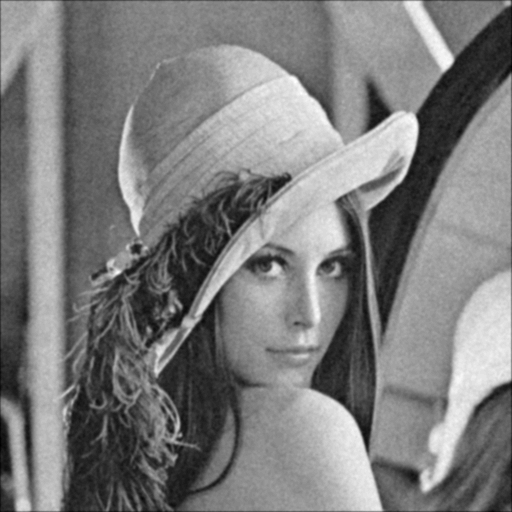

In [28]:
imshow(conv2(addNoise(I, Igauss, 5), kernel_gaussiano, "same"))

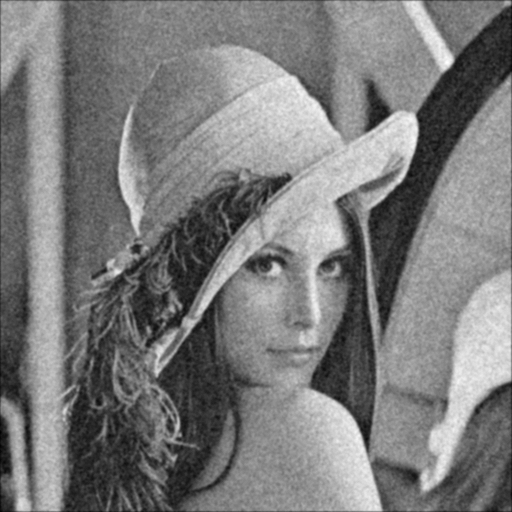

In [29]:
imshow(conv2(addNoise(I, Igauss2, 5), kernel_gaussiano, "same"))

## 4b. Ruido Rayleigh multiplicativo

In [30]:
function res = rayleighrnd(epsilon, Isize)
    res = sqrt(-epsilon * log(1-rand(Isize)));
endfunction

In [31]:
Inoise = rayleighrnd(2, size(I));

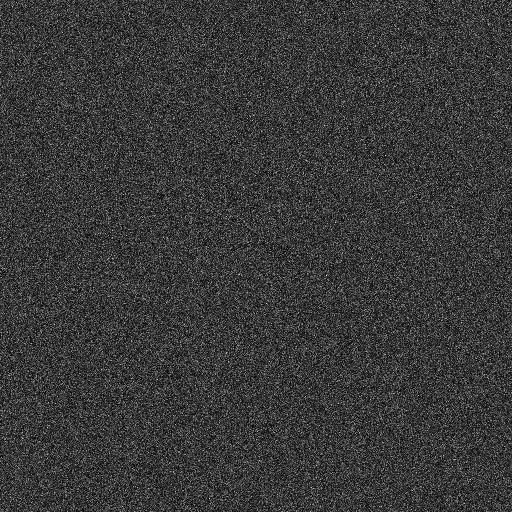

In [32]:
imshow(Inoise);

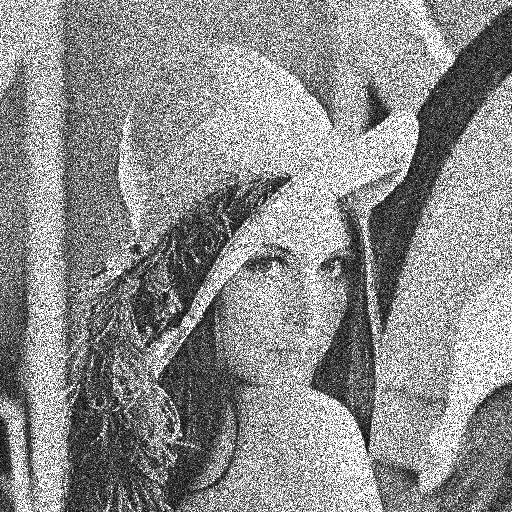

In [33]:
imshow(I .* Inoise);

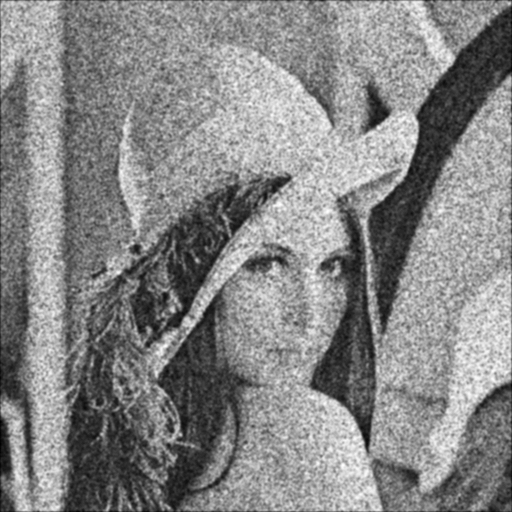

In [34]:
imshow(conv2(I .* Inoise, kernel_gaussiano, "same"));

In [35]:
Inoise = rayleighrnd(0.5, size(I));

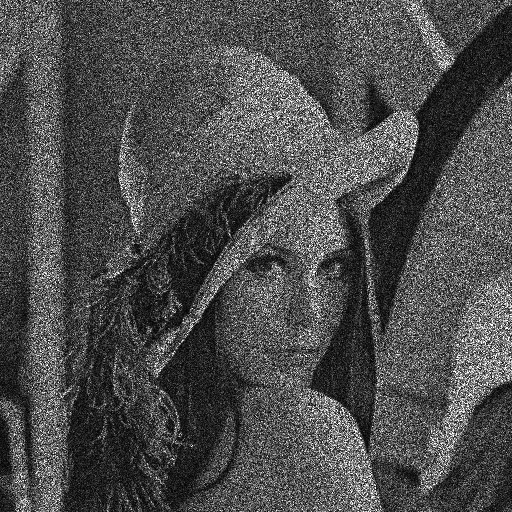

In [36]:
imshow(I .* Inoise);

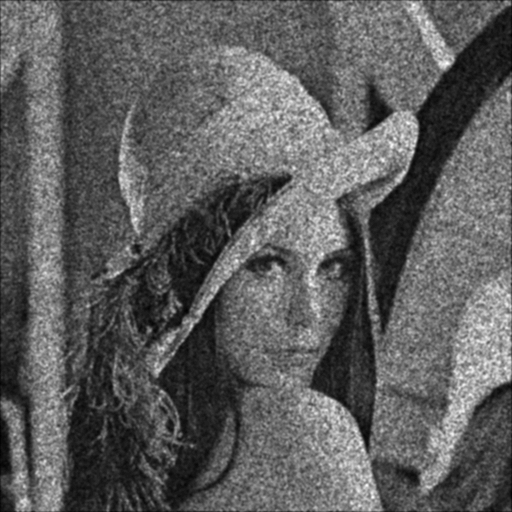

In [37]:
imshow(conv2(I .* Inoise, kernel_gaussiano, "same"));

## 5. Implementar filtro de mediana

In [38]:
function filtroMed = filtroMediana(img, tamanio)
    img = cast(img, 'single');
    halfSize = floor(tamanio / 2);
    filtroMed = ones(size(img));
        
    for i = (halfSize + 1) : (size(img, 1) - halfSize)
        for j = (halfSize + 1) : (size(img, 2) - halfSize)
            vecinosMatriz = img(i-halfSize:i+halfSize,j-halfSize:j+halfSize,1);
            vecinosVector = vecinosMatriz(:);
            filtroMed(i,j) = median(vecinosVector,1);
        end
    end;
endfunction

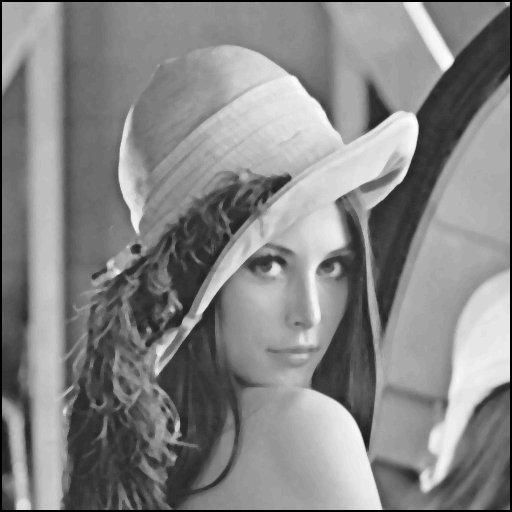

In [39]:
I = imread("img/lena.png");
I_filtroMediana = filtroMediana(I,5);
imshow(I_filtroMediana)

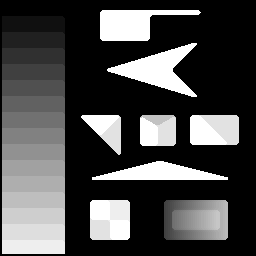

In [40]:
I = imread("img/test.png");
I_filtroMediana = filtroMediana(I,5);
imshow(I_filtroMediana)

## 6. Contaminar imágenes del ítem 3. con ruido impulsivo y aplicar filtro de mediana

In [41]:
function res = saltPepperNoise(img, Ps, Pp)
    noiseImpulsive = rand(size(img));
    res = img;
    res(noiseImpulsive < Pp) = 0;
    res(noiseImpulsive > 1 - Ps) = 255;
endfunction

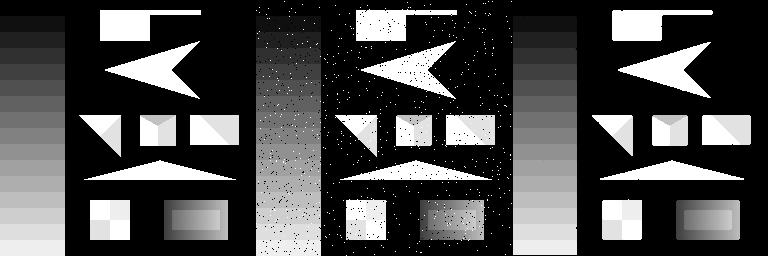

In [42]:
IwithNoise = saltPepperNoise(I, 0.01, 0.02);
imshow([I, IwithNoise, filtroMediana(IwithNoise, 3)])

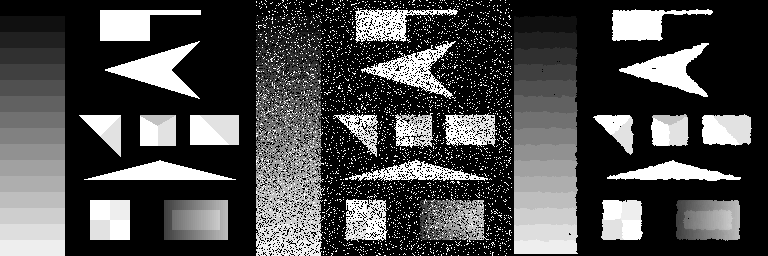

In [43]:
IwithNoise = saltPepperNoise(I, 0.1, 0.2);
imshow([I, IwithNoise, filtroMediana(IwithNoise, 4)])

## 7. Implementar Detector de borde por método de gradiente

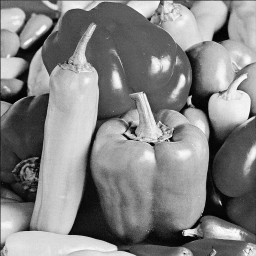

In [44]:
Im = imread("img/peppers.png");
imshow(Im);

### 7a. Roberts

In [45]:
FilterRoberts1 = [1 0 0; 0 -1 0; 0 0 0]

FilterRoberts1 =

   1   0   0
   0  -1   0
   0   0   0



In [46]:
FilterRoberts2 = [0 1 0; -1 0 0; 0 0 0]

FilterRoberts2 =

   0   1   0
  -1   0   0
   0   0   0



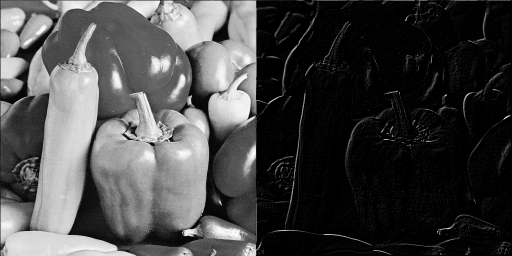

In [47]:
imshow([Im, conv2(Im, FilterRoberts1, "same")])

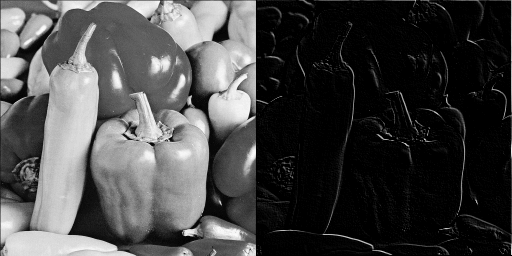

In [48]:
imshow([Im, conv2(Im, FilterRoberts2, "same")])

### 7b. Prewitt

In [77]:
% descomentar esta linea para instalar el paquete (tarda unos minutos en compilar)
% pkg install -forge image

In [63]:
pkg load image

In [64]:
FilterPrewitt = fspecial('Prewitt')

FilterPrewitt =

   1   1   1
   0   0   0
  -1  -1  -1



In [65]:
FilterPrewitt2 = rot90(FilterPrewitt, 2)

FilterPrewitt2 =

  -1  -1  -1
   0   0   0
   1   1   1



In [66]:
FilterPrewitt3 = rot90(FilterPrewitt, 3)

FilterPrewitt3 =

  -1   0   1
  -1   0   1
  -1   0   1



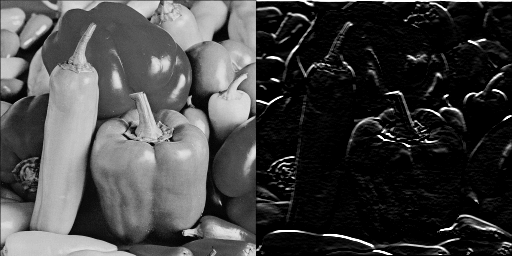

In [67]:
imshow([Im, conv2(Im, FilterPrewitt, "same")])

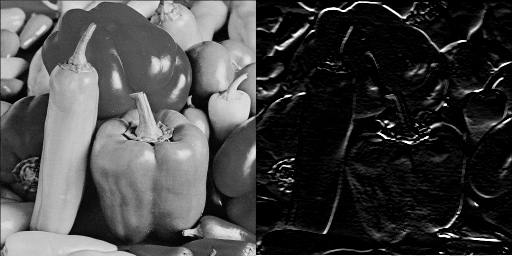

In [68]:
imshow([Im,conv2(Im, FilterPrewitt2, "same")])

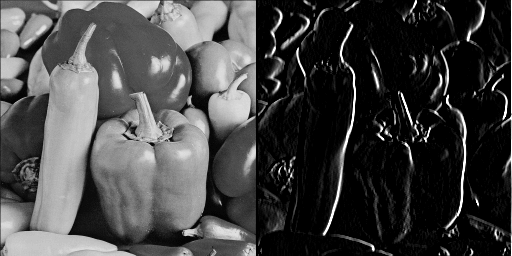

In [69]:
imshow([Im, conv2(Im, FilterPrewitt3, "same")])

### 7c. Sobel

In [70]:
FilterSobelHor = fspecial('Sobel')

FilterSobelHor =

   1   2   1
   0   0   0
  -1  -2  -1



In [74]:
FilterSobelVer = rot90(FilterSobelHor, 3)

FilterSobelVer =

  -1   0   1
  -2   0   2
  -1   0   1



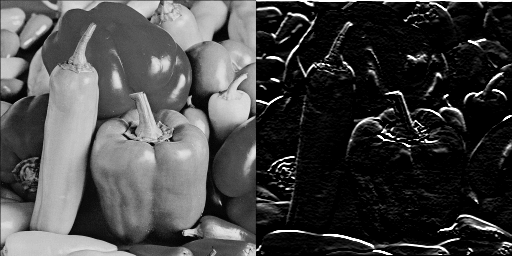

In [75]:
imshow([Im, conv2(Im, FilterSobelHor, "same")])

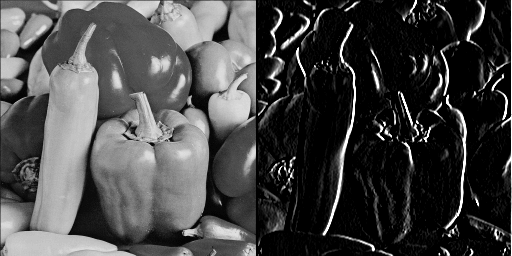

In [76]:
imshow([Im, conv2(Im, FilterSobelVer, "same")])

## 8. Aplicar los detectores de borde del ítem 7 a las imágenes del ítem 3, contaminadas con distintos ruidos